In [1]:
from aggregation import Aggregator, get_subject_image
from aggregation import SOL
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from scipy.cluster.hierarchy import dendrogram
plt.style.use('default')
%matplotlib inline

In [2]:
aggregator = Aggregator('reductions/point_reducer_hdbscan_box_the_jets.csv', 
                        'reductions/shape_reducer_hdbscan_box_the_jets.csv')
aggregator.load_extractor_data('extracts/point_extractor_by_frame_box_the_jets.csv',
                               'extracts/shape_extractor_rotateRectangle_box_the_jets.csv')

In [3]:
sol = SOL('SOL/SOL_Tc_stats.csv', aggregator)
SOL_event = 'SOL2011-01-20T09:00:09L289C165'
# SOL_event = 'SOL2011-03-20T00:00:04L223C126'
# SOL_event = 'SOL2012-06-23T06:00:04L315C163'

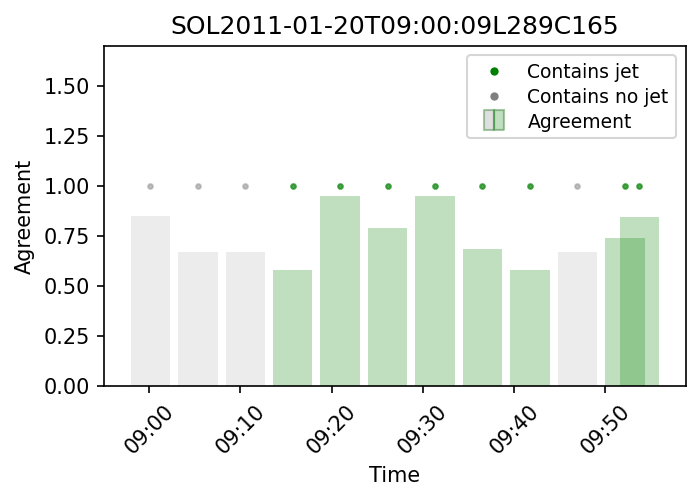

In [4]:
sol.event_bar_plot(SOL_event)

Plot out the subjects in the SOL event first to see what the jets look like

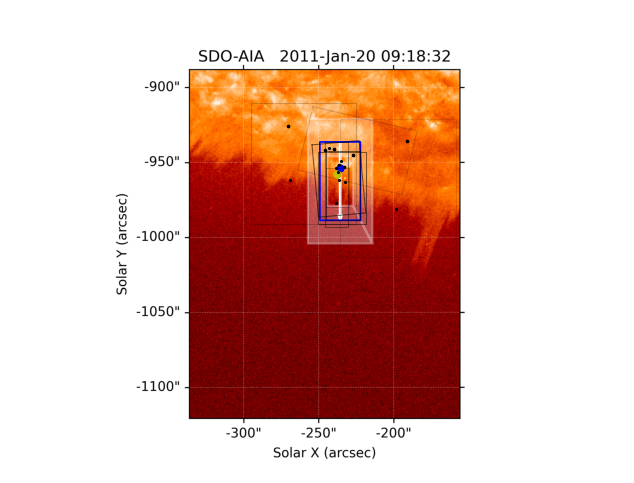

/home/rsankar/zooniverse/projects/SolarJets/BoxTheJets/aggregation/workflow.py:843: RuntimeWarning: invalid value encountered in sqrt
  box_gamma[i] = np.sqrt(1. - csg[i])


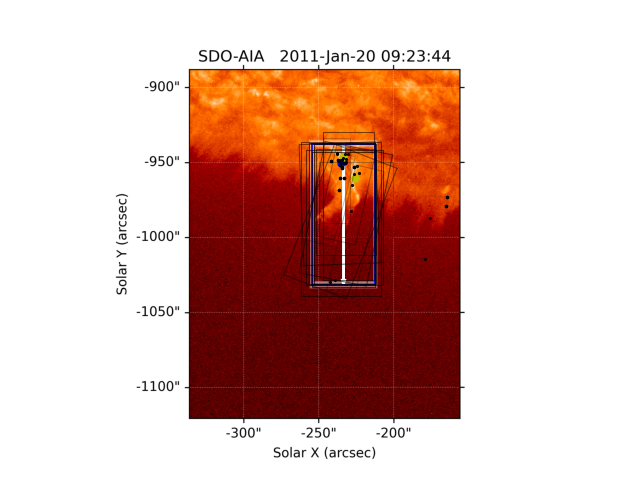

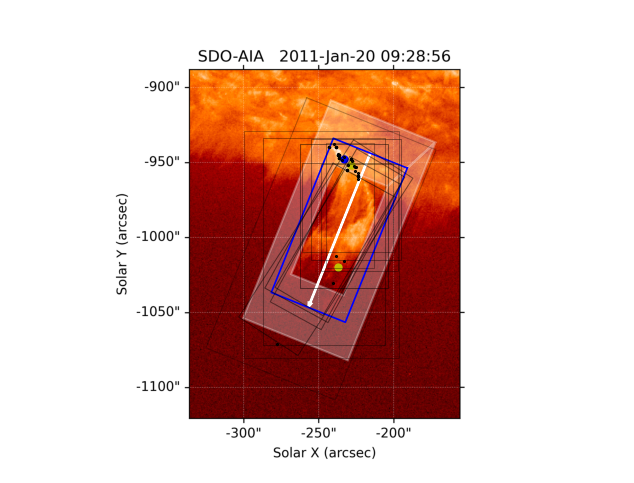

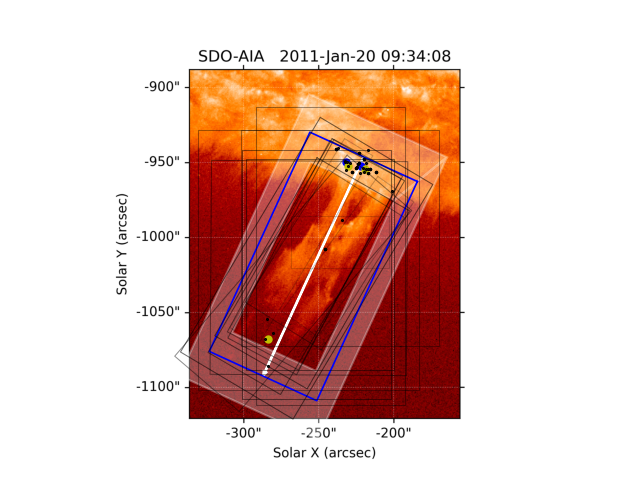

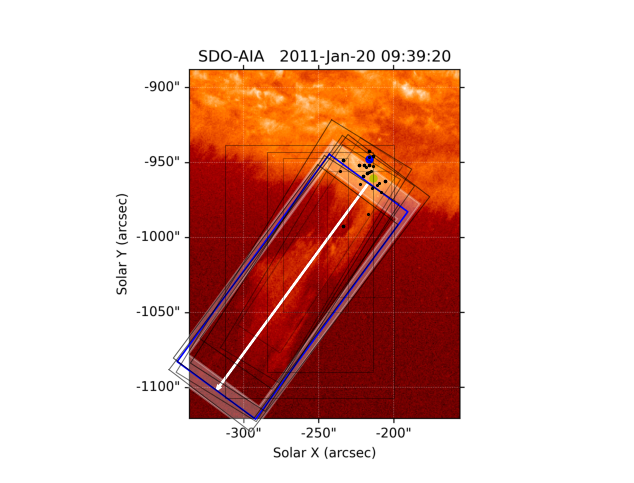

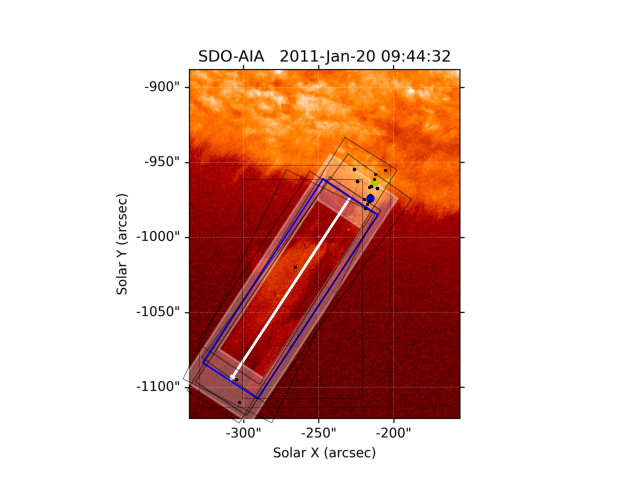

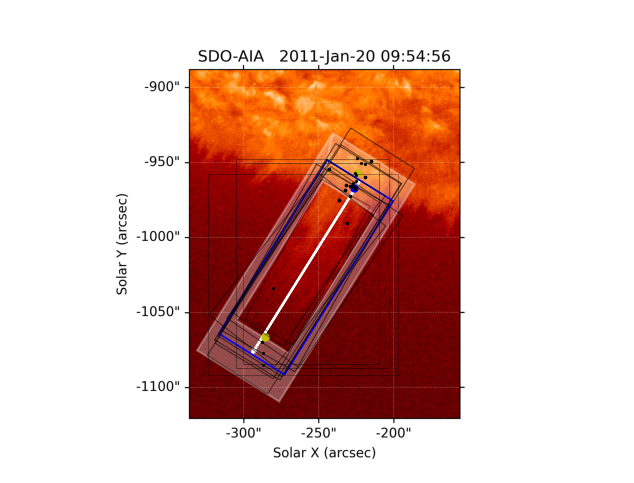

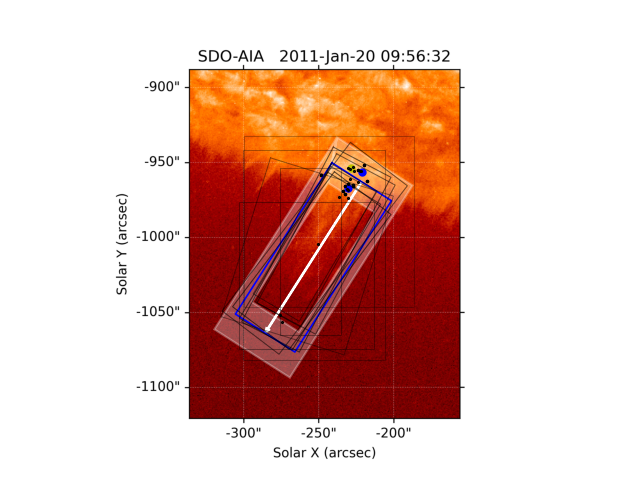

In [5]:
for subject in sol.get_subjects(SOL_event):
    try:
        aggregator.filter_classifications(subject, plot=True)
    except (IndexError, ValueError):
        continue

Do the clustering. This will return the clusters, which are `JetCluster` object, which each have a list of `Jet` objects

In [6]:
clusters, distance_met, point_met, box_met = sol.filter_jet_clusters(SOL_event, eps=3, time_eps=2.)

/home/rsankar/zooniverse/projects/SolarJets/BoxTheJets/aggregation/workflow.py:843: RuntimeWarning: invalid value encountered in sqrt
  box_gamma[i] = np.sqrt(1. - csg[i])


Using eps=3 and time_eps=60.0 min


Print out the clusters to see the distribution

In [7]:
print(clusters)
for j, cluster in enumerate(clusters):
    print(j, len(cluster.jets))

0 8


Here, we can pick a specific cluster to plot out all the jets corresponding to that cluster

70439520 [1033.75313314  485.56187948]


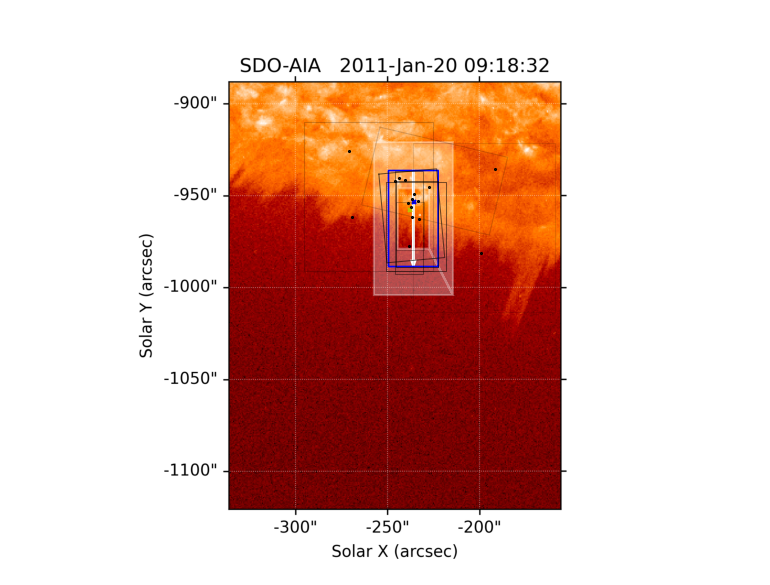

70439521 [1035.84464809  468.86444092]


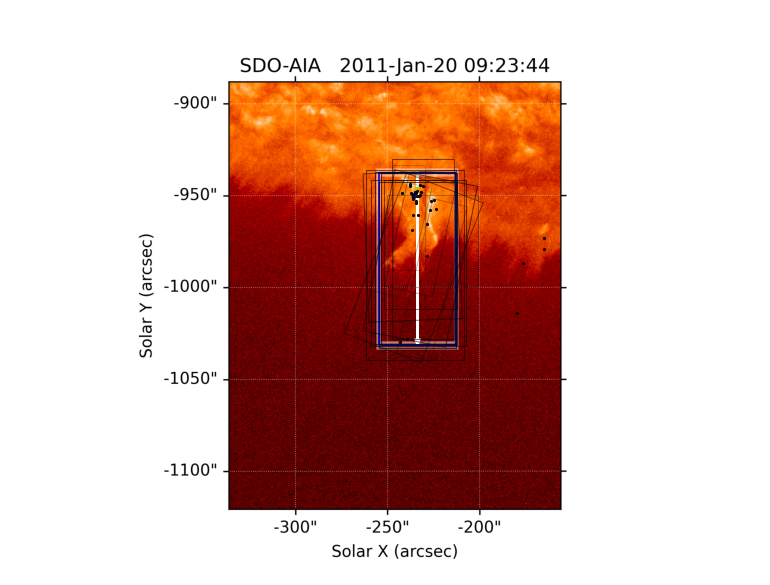

70439522 [1045.92751312  456.83213806]


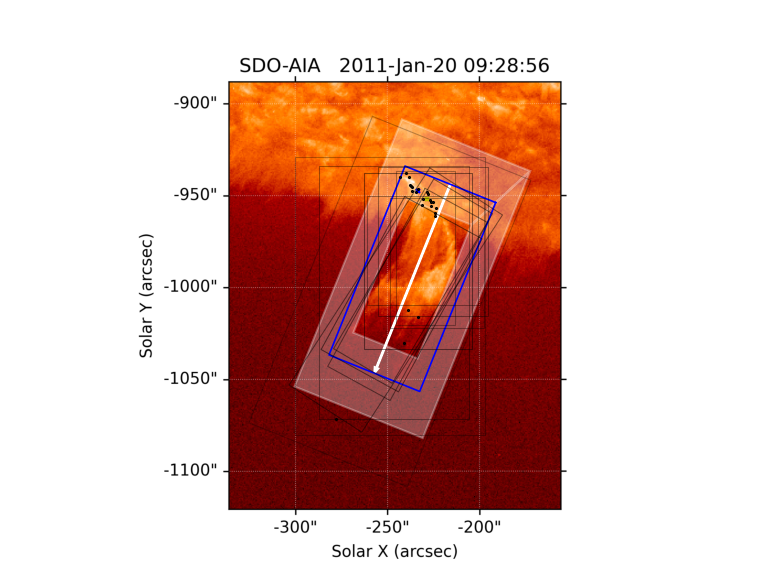

70439523 [1097.93919678  478.34670105]


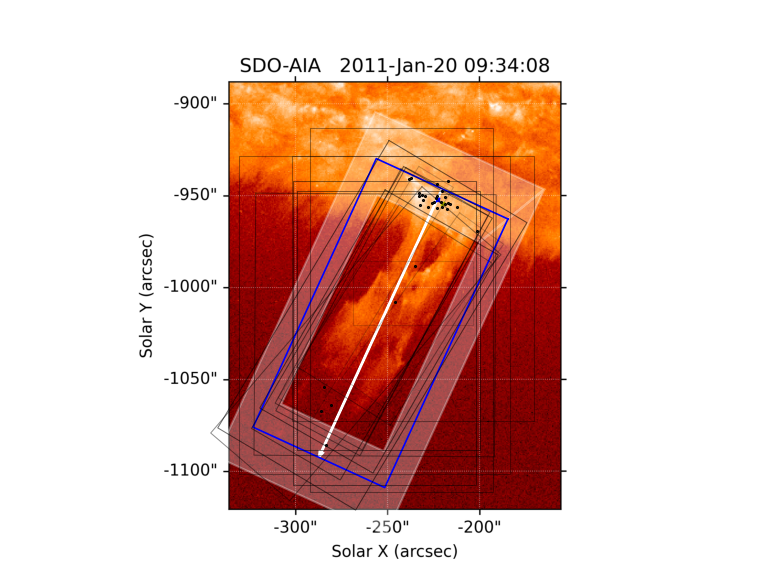

70439524 [1124.31047363  456.05320435]


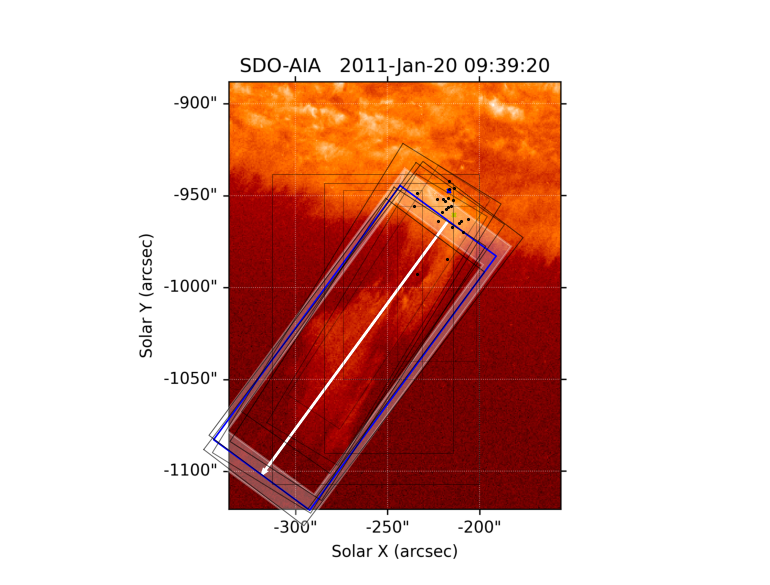

70439525 [1127.64123535  580.77548218]


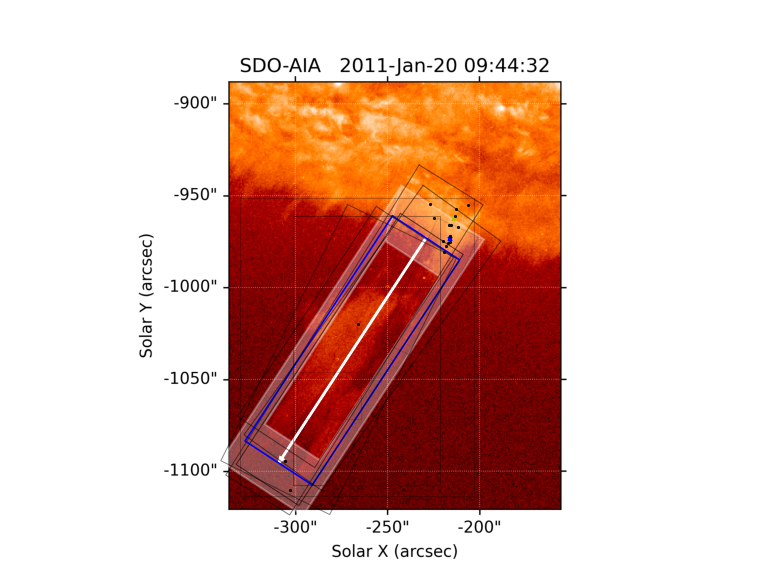

70439527 [1077.28125     547.84667969]


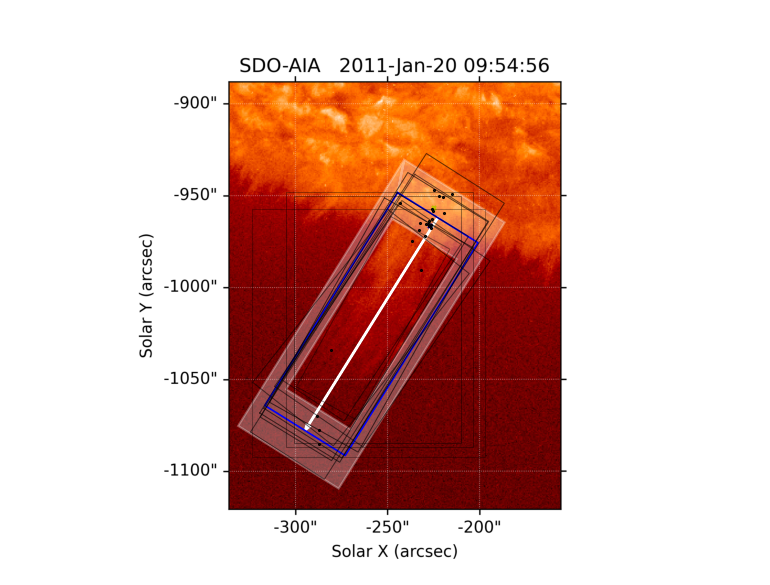

70439528 [1057.63566589  549.90052795]


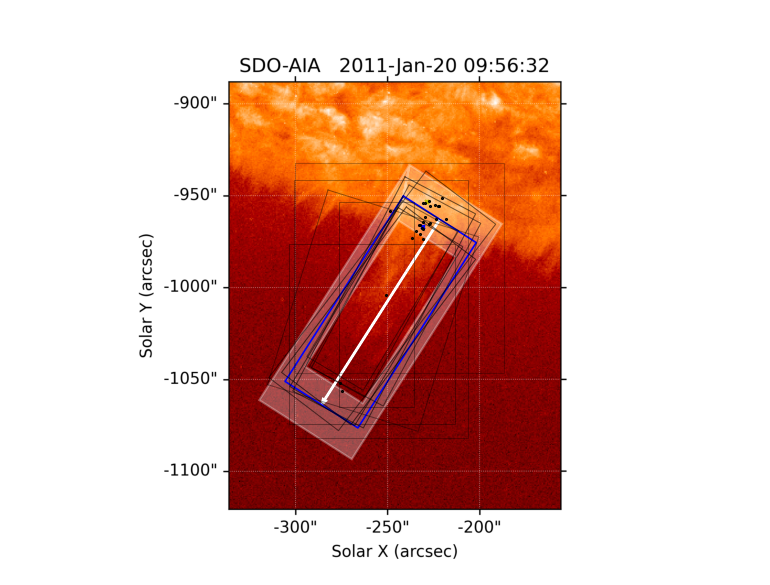

In [8]:
for jet in clusters[0].jets:
    print(jet.subject, jet.start)
    fig, ax = plt.subplots(1, 1, dpi=150)
    ax.imshow(get_subject_image(jet.subject))
    jet.plot(ax)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

This code creates an MP4 of a given cluster event. Be sure to change the name when saving

In [ ]:
import tqdm
'''
    Create a gif of the jet objects showing the 
    image and the plots from the `Jet.plot()` method
'''
fig, ax = plt.subplots(1,1, dpi=150)

# create a temp plot so that we can get a size estimate
subject0 = clusters[2].jets[0].subject

ax.imshow(get_subject_image(subject0, 0))
ax.axis('off')
fig.tight_layout(pad=0)

# loop through the frames and plot
ims = []
for jet in tqdm.tqdm(clusters[2].jets):
    subject = jet.subject
    for i in range(15):
        img = get_subject_image(subject, i)

        # first, plot the image
        im1 = ax.imshow(img)

        # for each jet, plot all the details
        # and add each plot artist to the list
        jetims = jet.plot(ax)

        # combine all the plot artists together
        ims.append([im1, *jetims])

# save the animation as a gif
ani = animation.ArtistAnimation(fig, ims)
ani.save('test2.mp4', writer='imagemagick')
